In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Domain Knowledge

In [3]:
data = pd.read_csv('dataset/diamonds.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Berdasarkan informasi dari Kaggle, variabel-variabel pada Diamond dataset adalah sebagai berikut:

- Harga dalam dolar Amerika Serikat ($) adalah fitur target. 
- carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
- cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

![diamond.png](assets/diamond.png)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Dari output terlihat bahwa:

- Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# Data Cleaning

### Handling Missing Value

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Melihat apakah ada missing value atau tidak pada dataset

- Null value nya sedikit, maka bisa kita hapus aja
- Null valuenya banyak, maka bisa kita isi dengan feature engineering

In [7]:
x = (data.x == 0).sum()
y = (data.y == 0).sum()
z = (data.z == 0).sum()

print("Nilai 0 di kolom x: ", x)
print("Nilai 0 di kolom y: ", y)
print("Nilai 0 di kolom z: ", z)

Nilai 0 di kolom x:  8
Nilai 0 di kolom y:  7
Nilai 0 di kolom z:  20


In [8]:
data.loc[(data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
# drop baris dengan nilai 'x', 'y', dan 'z' yang bernilai 0
data = data.loc[(data[['x', 'y', 'z']]!=0).all(axis=1)]

# cek ukuran data untuk memastikan baris sudah di-drop
data.shape

(53920, 10)

In [10]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Handling Outliers

Pada kasus ini, outliers dideteksi dengan teknik visualisasi data (boxplot). Kemudian, kita akan menangani outliers dengan teknik IQR method. IQR adalah singkatan dari Inter Quartile Range. Untuk memahami apa itu IQR, mari kita ingat lagi konsep kuartil. Kuartil dari suatu populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat dari data berada di bawah kuartil pertama (Q1), setengah dari data berada di bawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3). Dengan demikian interquartile range atau IQR = Q3 - Q1.

Berikut adalah ilustrasi dan penjelasan nilai statistik pada boxplot.
![boxplot.png](assets/boxplot.png)

<AxesSubplot:xlabel='carat'>

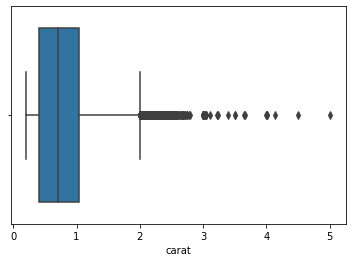

In [11]:
sns.boxplot(x=data['carat'])

<AxesSubplot:xlabel='depth'>

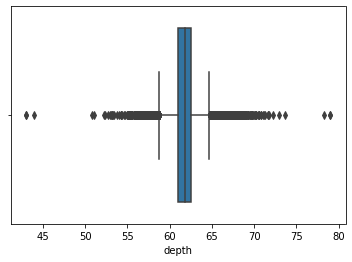

In [12]:
sns.boxplot(x=data['depth'])

<AxesSubplot:xlabel='table'>

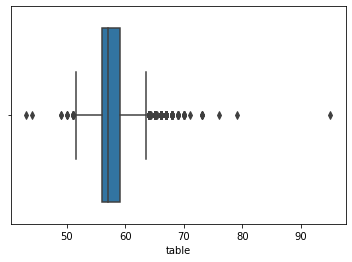

In [13]:
sns.boxplot(x=data['table'])

<AxesSubplot:xlabel='x'>

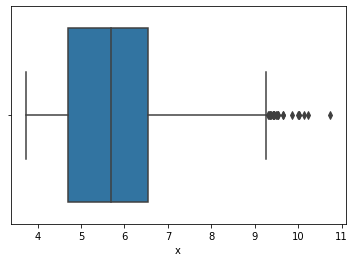

In [14]:
sns.boxplot(x=data['x'])

<AxesSubplot:xlabel='y'>

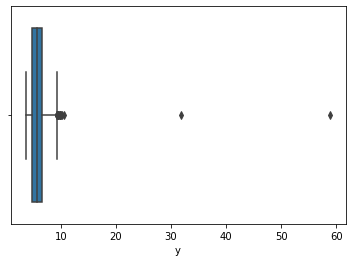

In [15]:
sns.boxplot(x=data['y'])

<AxesSubplot:xlabel='z'>

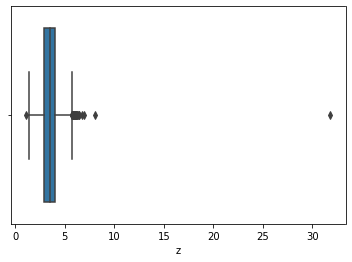

In [16]:
sns.boxplot(x=data['z'])

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas terdapat outliers. Selanjutnya adalah mengatasi outliers tersebut dengan metode yang telah kita bahas sebelumnya yaitu metode IQR. Kita akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier. 

Hal pertama yang perlu kita lakukan adalah membuat batas bawah dan batas atas. Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3.

Berikut persamaannya:  
**Batas bawah = Q1 - 1.5 * IQR**  
**Batas atas = Q3 + 1.5 * IQR**

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# cek ukuran dataset setelah kita drop outliers
data.shape

(47524, 10)

# Exploratory Data Analysis

### Univariate Analysis
Kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama , kita bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [18]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

#### Categorical Features
Lakukan analisis terhadap categorical features terlebih dahulu. 

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


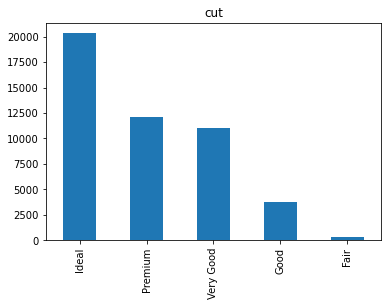

In [19]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


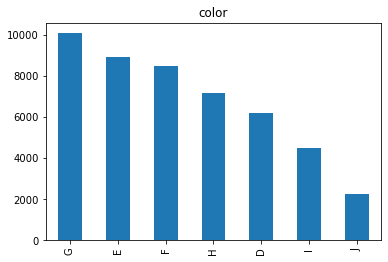

In [20]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

      jumlah sampel  persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


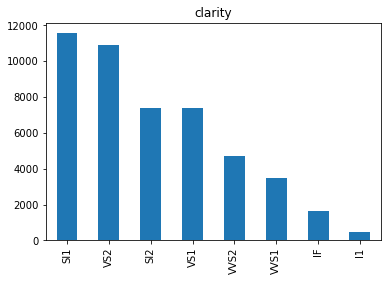

In [21]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

1. 'IF' - Internally Flawless 
2. 'VVS2' - Very Very Slight Inclusions 
3. 'VVS1' - Very Very Slight Inclusions 
4. 'VS1' - Very Slight Inclusions
5. 'VS2' - Very Slight Inclusions
6. 'SI2' - Slight Inclusions
7. 'SI1' - Slight Inclusions
8. 'I1' - Imperfect  

Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

#### Numerical Features

Selanjutnya, untuk fitur numerik, kita akan melihat histogram dari masing-masing fiturnya.

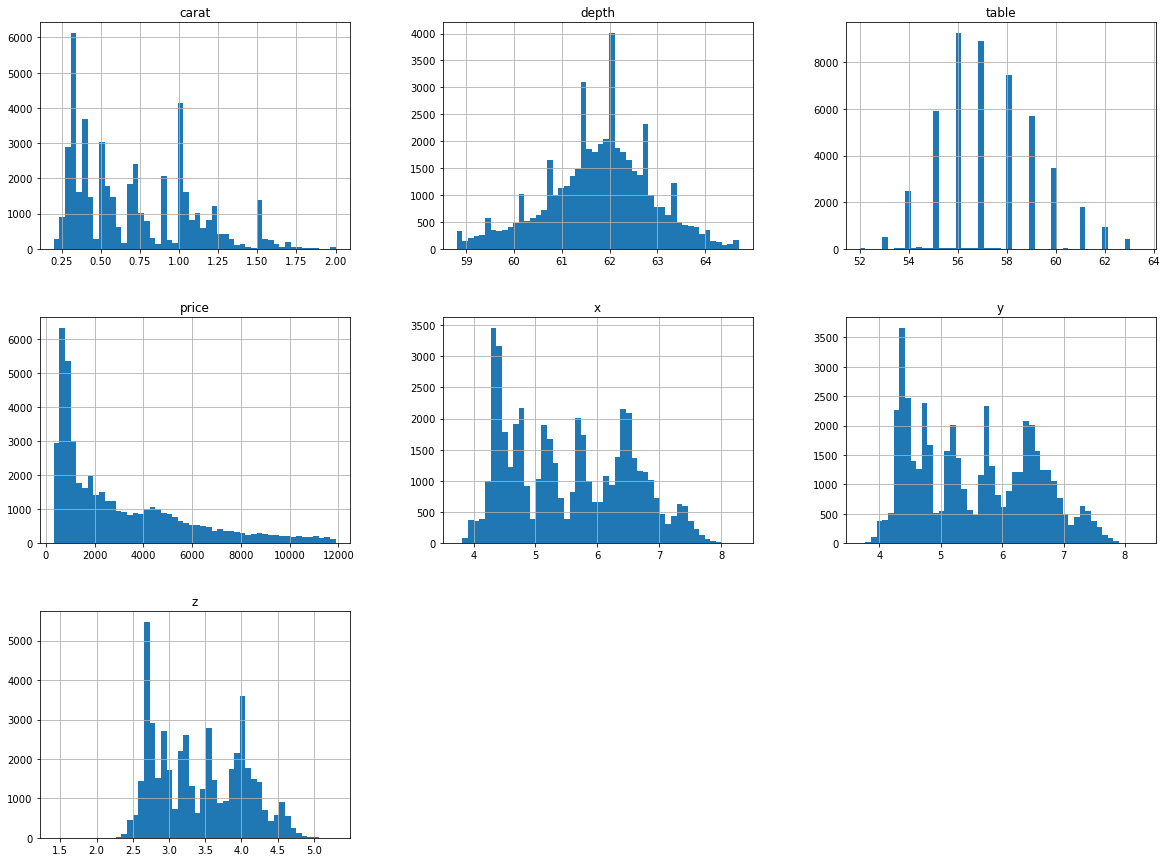

In [22]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data kita. Dari histogram "price", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.
- Setengah harga berlian bernilai di bawah $2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Multivariate Analysis
Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

#### Categorical Features

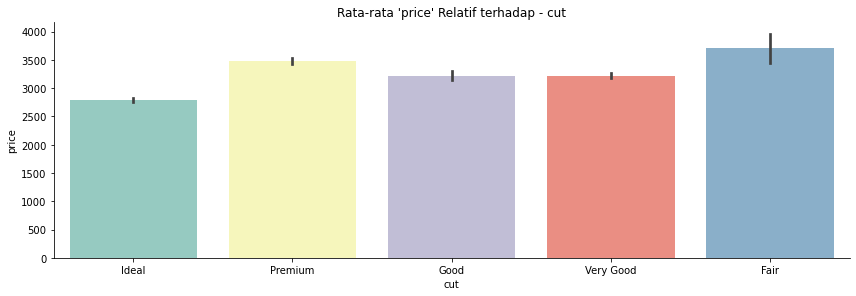

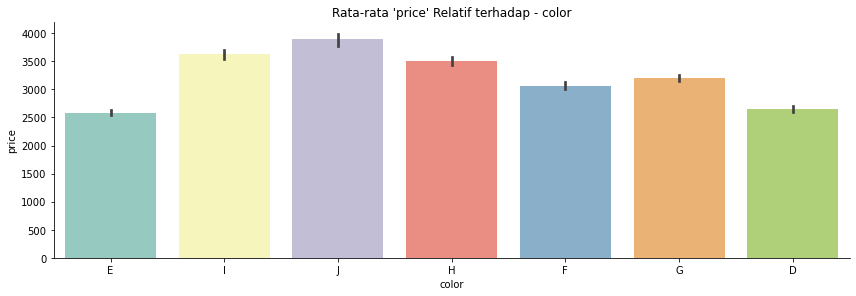

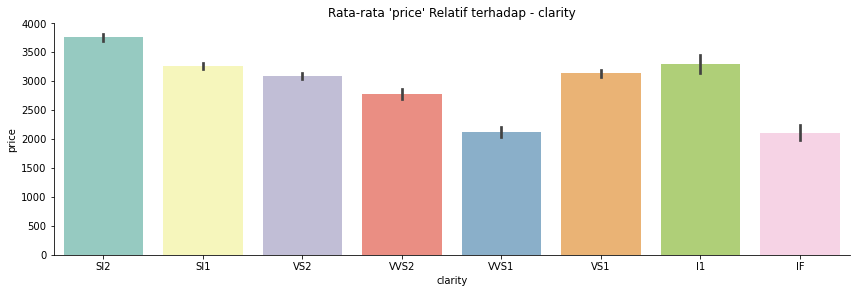

In [23]:
cat_features = data.select_dtypes(include="object").columns.to_list()

for col in cat_features:
    sns.catplot(
        x=col,
        y="price",
        kind="bar",
        dodge=False,
        height=4,
        aspect=3,
        data=data,
        palette="Set3",
    )
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))


Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh _insight_ sebagai berikut:

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 2500 hingga 3500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.

Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

#### Numerical Features
Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

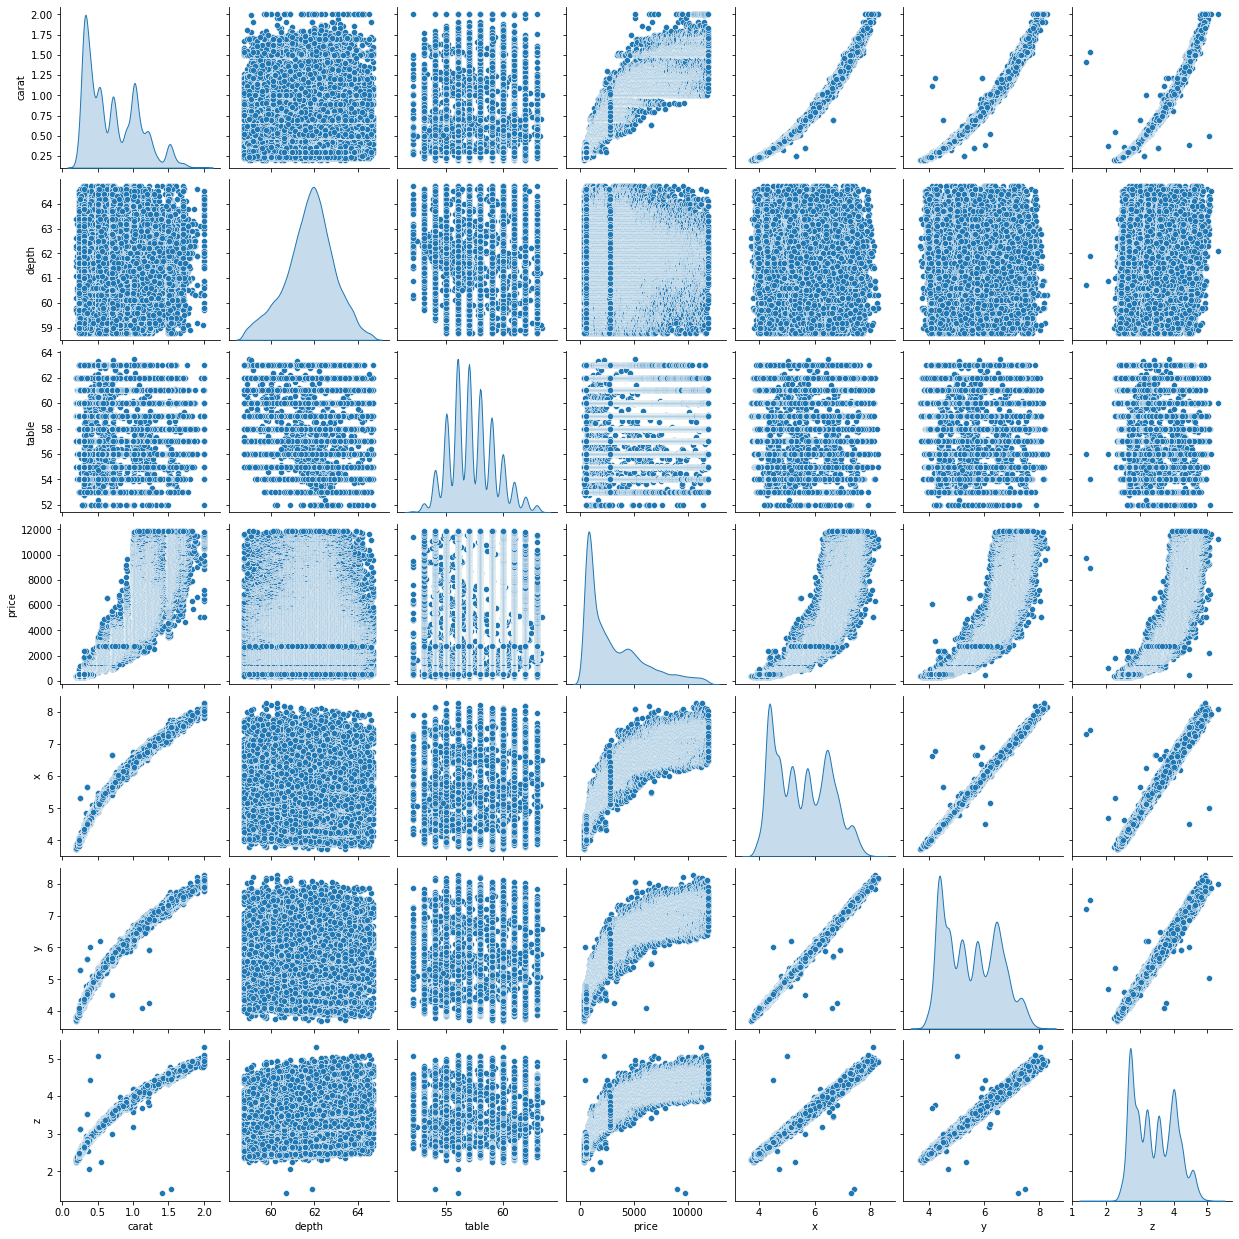

In [24]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Misalnya, relasi antara fitur 'x' pada sumbu x dengan fitur 'z' pada sumbu y atau relasi antara fitur 'carat' pada sumbu x dengan 'price' pada sumbu y. Dari grafik, kita dapat melihat plot relasi masing-masing fitur numerik pada dataset.

Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target kita yaitu 'price'. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target 'price', dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur 'price' berada pada baris keempat (dari atas) sumbu y. Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target 'price' pada baris tersebut saja. 

Sebelum memperhatikan pola sebaran data pada grafik pairplot di atas, mari kita pahami terlebih dahulu cara membaca korelasi pada sebaran data. Korelasi pada fitur tampak dari adanya pola pada sebaran data. Sebaran data acak merupakan indikasi korelasi yang lemah (atau tidak ada korelasi sama sekali). Sedangkan, sebaran yang memiliki pola (tidak acak) merupakan indikasi adanya korelasi. Perhatikan contoh gambar berikut.
![correlation.png](assets/correlation.png)
Dari pola sebaran data (titik-titik) pada gambar di atas, pola data grafik A memiliki korelasi positif. Hal ini ditandai dengan meningkatnya variabel pada sumbu y saat terjadi peningkatan variabel pada sumbu x. Sedangkan, pola data grafik B memiliki korelasi negatif yang ditandai dengan menurunnya variabel y saat terjadi kenaikan pada variabel x. Terakhir, sebaran pada data grafik C menunjukkan pola acak, artinya tidak ada korelasi data.

Pada pola sebaran data grafik pairplot sebelumnya, terlihat 'carat', 'x', 'y', dan 'z' memiliki korelasi yang tinggi dengan fitur "price". Sedangkan kedua fitur lainnya yaitu 'depth' dan 'table' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

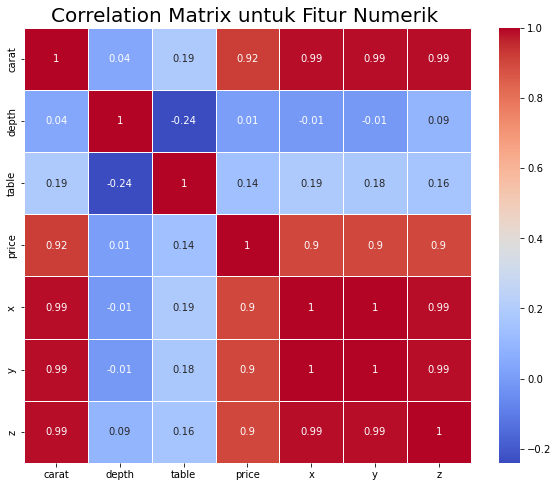

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

# untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun). 

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur 'carat', 'x', 'y', dan 'z' memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target 'price'. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur 'depth' memiliki korelasi yang sangat kecil (0.02). Sehingga, fitur tersebut dapat di-drop.

In [26]:
data.drop(['depth'], inplace=True, axis=1)

In [27]:
data.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


# Data Preparation

### Encoding Categorical Features
Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Kita memiliki tiga variabel kategori dalam dataset kita, yaitu 'cut', 'color', dan 'clarity'. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

In [28]:
from sklearn.preprocessing import OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['cut'], prefix='cut')], axis=1)
data = pd.concat([data, pd.get_dummies(data['color'], prefix='color')], axis=1)
data = pd.concat([data, pd.get_dummies(data['clarity'], prefix='clarity')], axis=1)
data.drop(['cut','color','clarity'], axis=1, inplace=True)
data.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Dimension Reduction using PCA
Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari "n-dimensional space" ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

PCA bekerja menggunakan metode aljabar linier. Ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting (utama). PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. 

Karena hal inilah, teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya. 

Berikut penjelasan untuk masing-masing komponen utama (PC):

- PC pertama mewakili arah varians maksimum dalam data. Ia paling banyak menangkap informasi dari semua fitur dalam data. 
- PC kedua menangkap sebagian besar informasi yang tersisa setelah PC pertama. 
- PC ketiga menangkap sebagian besar informasi yang tersisa setelah PC pertama, PC kedua, dst.

Jika kita cek menggunakan fungsi pairplot, ketiga fitur ukuran diamonds dalam kolom 'x', 'y', dan 'z' memiliki korelasi yang tinggi. Hal ini karena ketiga fitur ini memiliki informasi yang sama, yaitu ukuran diamonds. 

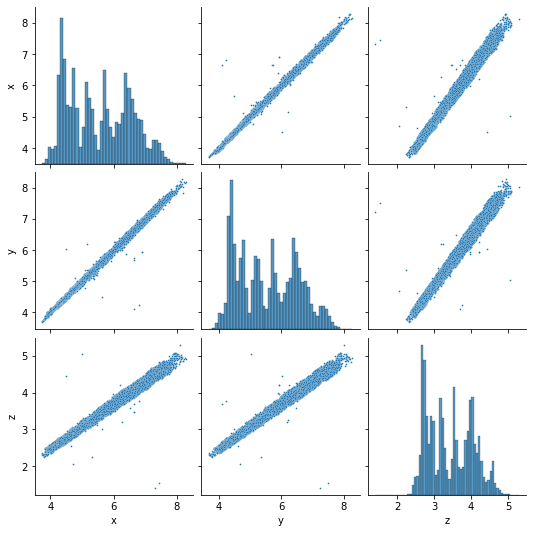

In [29]:
sns.pairplot(data[['x','y','z']], plot_kws={"s": 3});

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(data[['x','y','z']])
princ_comp = pca.transform(data[['x','y','z']])

In [31]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Arti dari output di atas adalah, 99.8% informasi pada ketiga fitur 'x', 'y', 'z' terdapat pada PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat pada PC kedua dan ketiga. Perhatikanlah, jumlahnya jadi > 100%. Hal ini disebabkan oleh proses pembulatan (round) dalam 3 desimal ya, jadi tidak perlu khawatir. 

Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur lainnya ('x', 'y', 'z'). Kita beri nama fitur ini 'dimension'.

Sekarang Anda akan membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'x', 'y', dan'z' . Oleh karena itu, mari jalankan kode di atas dengan beberapa perubahan berikut:

- Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
- Fit model dengan data masukan.
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom 'x', 'y', dan 'z'.

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(data[['x','y','z']])
data['dimension'] = pca.transform(data.loc[:, ('x','y','z')]).flatten()
data.drop(['x','y','z'], axis=1, inplace=True)

In [33]:
data.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


### Train-Test-Split

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(["price"],axis =1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [35]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


### Standarization
Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn, 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [36]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [37]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


# Model Development
Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm